# Plot_maps_DTW_Hierarchical_comuni

In [1]:
# import the library
import pandas as pd
import geopandas as gpd # Let's import geopandas
import matplotlib.pyplot as plt

In [65]:
prov = gpd.read_file("limits_IT_provinces.geojson")
prov = prov[prov['reg_name'] == 'Toscana']
prov['prov_name'] = prov['prov_name'].apply(lambda x : x.strip().lower().replace(' ','-').replace('ò','o').replace('\'','-'))

In [61]:
def func(x):
        if x not in ['firenze','arezzo', 'grosseto', 'livorno', 'lucca', 'massa', 'pisa', 'pistoia', 'prato','siena']:
            return ''
        else:
            return x

In [71]:
prov = prov.to_crs(epsg=3857)

In [84]:
tess = gpd.read_file("limits_IT_municipalities.geojson")
tess = tess[tess['reg_name'] == 'Toscana']
labels = pd.read_csv('comuni_labels_4.csv')
labels = labels.rename(columns = {'comune':'name'})
tess['name'] = tess['name'].apply(lambda x : x.strip().lower().replace(' ','-').replace('ò','o').replace('\'','-'))
tess['name'] = tess['name'].replace({'crespina-lorenzana':'crespina-e-lorenzana', 'pratovecchio-stia':'pratovecchio-e-stia'})
print(set(labels['name'])-set(tess['name']))
tess = pd.merge(tess,labels,how = 'left',on = 'name')

tess['label']=tess['label'].replace({1.0:'Upward shape (subset 1)',2.0:'Downward shape',3.0:'Upward shape',4.0:'Downward shape (subset 1)',5.0:'Downward shape (subset 2)',6.0:'Downward shape (subset 3)'})

set()


In [85]:
tess['capol']= tess['name'].apply(lambda x: func(x))

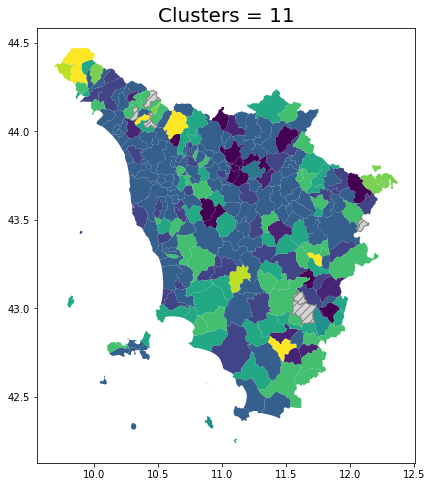

In [5]:
tess.plot(column='label',figsize = (12,8), cmap ='viridis',missing_kwds={"color": "lightgrey","edgecolor": "gray","hatch": "///","label": "Missing values"})
plt.title('Clusters = 11', fontsize = 20) #viridis,plasma,inferno,cividis
#plt.savefig('hier_results\\comuni_maps_11')

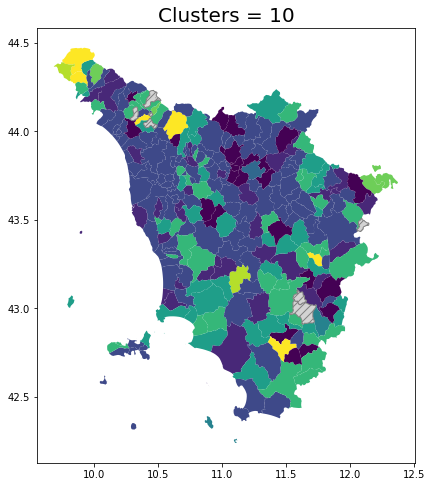

In [8]:
tess.plot(column='label',figsize = (12,8), cmap ='viridis',missing_kwds={"color": "lightgrey","edgecolor": "gray","hatch": "///","label": "Missing values"})
plt.title('Clusters = 10', fontsize = 20) #viridis,plasma,inferno,cividis
#plt.savefig('hier_results\\comuni_maps_10')

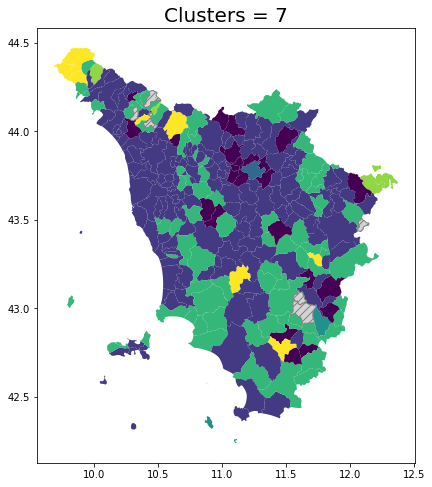

In [10]:
tess.plot(column='label',figsize = (12,8), cmap ='viridis',missing_kwds={"color": "lightgrey","edgecolor": "gray","hatch": "///","label": "Missing values"})
plt.title('Clusters = 7', fontsize = 20) #viridis,plasma,inferno,cividis
#plt.savefig('hier_results\\comuni_maps_7')

In [21]:
tess.head(2)

,name,op_id,minint_elettorale,prov_name,prov_istat_code,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,opdm_id,com_catasto_code,com_istat_code,com_istat_code_num,name_it,name_de,name_sl,geometry,label
0,aulla,4531,2090460010,Massa-Carrara,045,45,MS,Toscana,09,9,4431,A496,045001,45001,None,None,None,"MULTIPOLYGON (((1119203.190 5504286.470, 11197...",Downward shape
1,bagnone,4532,2090460020,Massa-Carrara,045,45,MS,Toscana,09,9,4432,A576,045002,45002,None,None,None,"MULTIPOLYGON (((1118282.788 5523415.170, 11191...",Downward shape (subset 2)


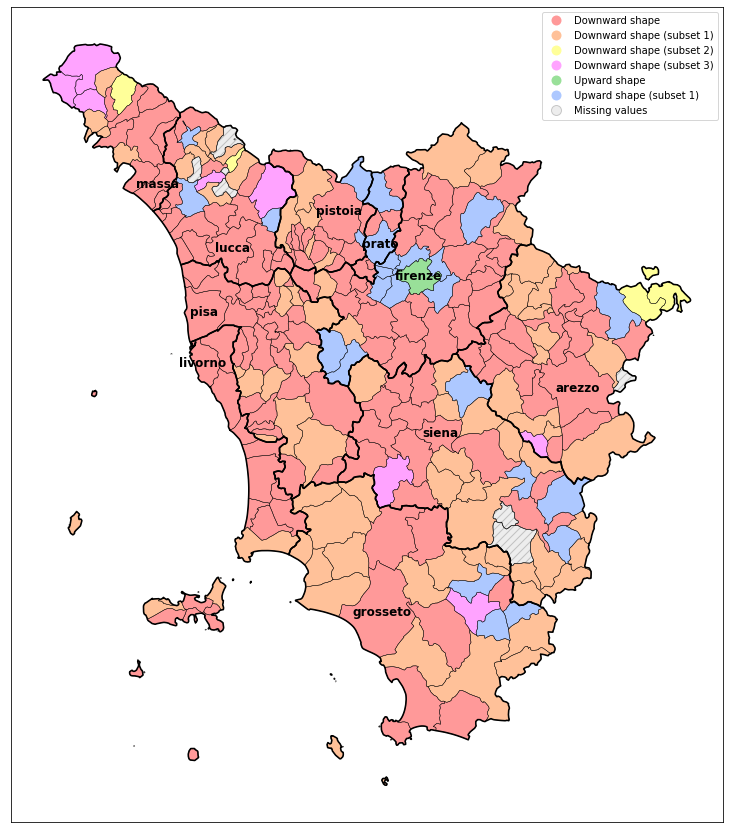

In [79]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
tess.apply(lambda x: ax.annotate(text=x['capol'], family='sans-serif',weight='bold', xy=x.geometry.centroid.coords[0], ha='center',va ='center', fontsize=12),axis=1);
tess.boundary.plot(ax=ax, color='Black', linewidth=.4)
prov.boundary.plot(ax=ax, color='Black', linewidth=1.6)
tess.plot(legend = True,categorical = True,ax=ax,column = 'label', cmap=cmap,alpha = 0.4, figsize=(12, 12),missing_kwds={"color": "lightgrey","edgecolor": "gray","hatch": "///","label": "Missing values"});#plt.legend(tess['label'])

plt.xticks([])
plt.yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([]);
#plt.title('Clusters = 2', fontsize = 20); #viridis,plasma,inferno,cividis
#plt.savefig('hier_results\\comuni_maps_2_legend2_capol')

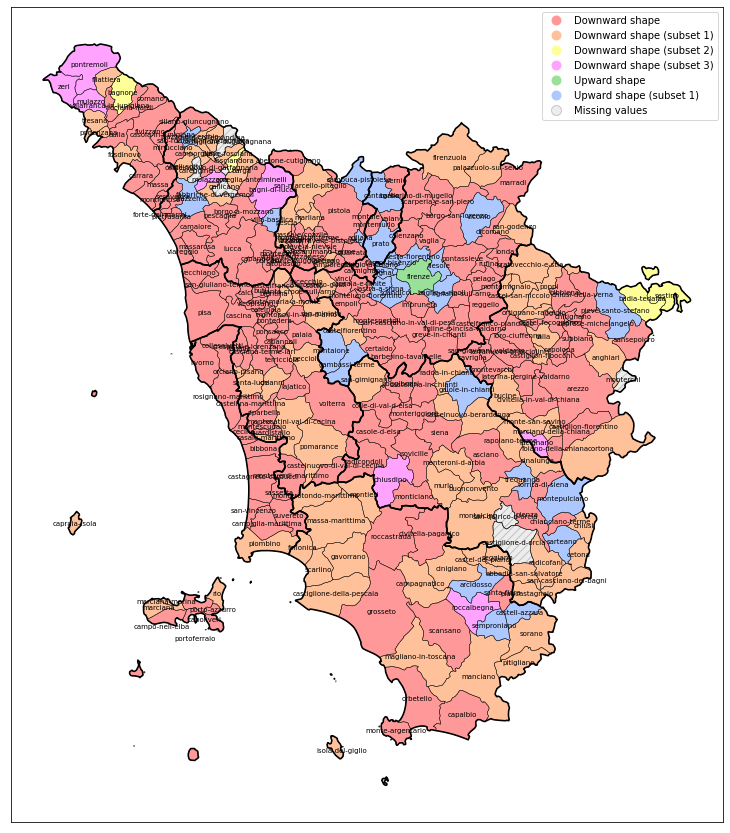

In [80]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
tess.apply(lambda x: ax.annotate(text=x['name'], family='sans-serif', xy=x.geometry.centroid.coords[0], ha='center',va ='center', fontsize=7),axis=1);
tess.boundary.plot(ax=ax, color='Black', linewidth=.4)
prov.boundary.plot(ax=ax, color='Black', linewidth=1.6)
tess.plot(legend = True,categorical = True,ax=ax,column = 'label', cmap=cmap,alpha = 0.4, figsize=(12, 12),missing_kwds={"color": "lightgrey","edgecolor": "gray","hatch": "///","label": "Missing values"});#plt.legend(tess['label'])

plt.xticks([])
plt.yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([]);
#plt.title('Clusters = 2', fontsize = 20); #viridis,plasma,inferno,cividis
#plt.savefig('hier_results\\comuni_maps_2_legend2_all')

In [ ]:
#00b300 green
##3377ff lightblue
#ff6600 orange
#ff1aff violet
#'yellow'
#red

In [13]:
import matplotlib.colors as clr
cmap = clr.ListedColormap(['red', '#ff6600', 'yellow','#ff1aff','#00b300','#3377ff'])#,3,,,,1

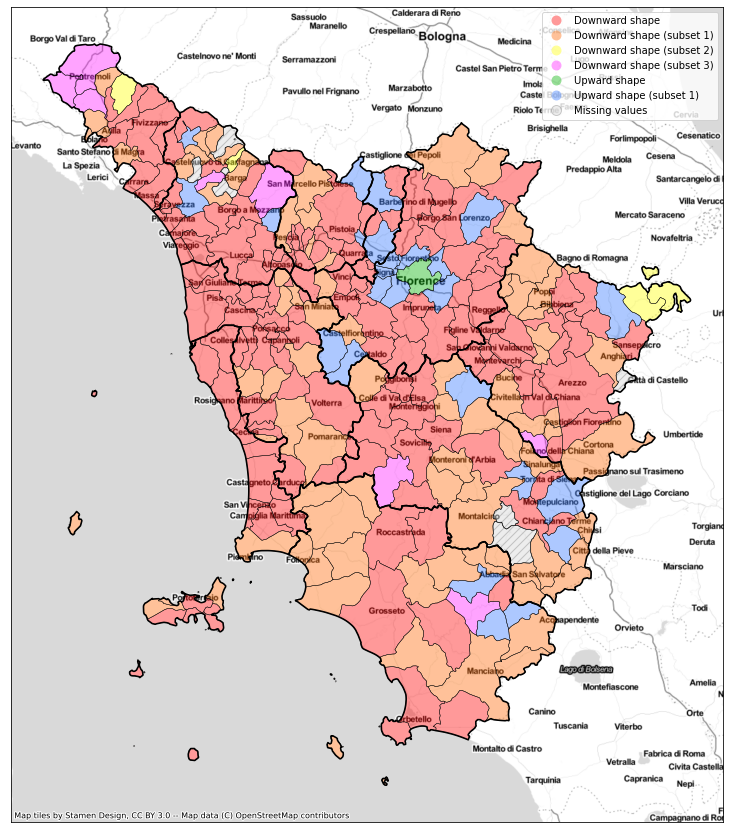

In [82]:
import contextily as ctx
#tess.columns = tess.columns.str.strip()
tess = tess.to_crs(epsg=3857)

fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
#tess.apply(lambda x: ax.annotate(text=x.name, family='sans-serif', xy=x.geometry.centroid.coords[0], ha='center',va ='center', fontsize=7),axis=1);
tess.boundary.plot(ax=ax, color='Black', linewidth=.4)
prov.boundary.plot(ax=ax, color='Black', linewidth=1.6)
tess.plot( legend = True,categorical = True,ax=ax,column = 'label', cmap=cmap,alpha = 0.4, figsize=(12, 12),missing_kwds={"color": "lightgrey","edgecolor": "gray","hatch": "///","label": "Missing values"});#plt.legend(tess['label'])



#ctx.add_basemap(ax)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, zoom = 9)
#ax.set_axis_off()



plt.xticks([])
plt.yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([]);
#plt.title('Clusters = 2', fontsize = 20); 
#plt.savefig('hier_results\\comuni_maps_6')

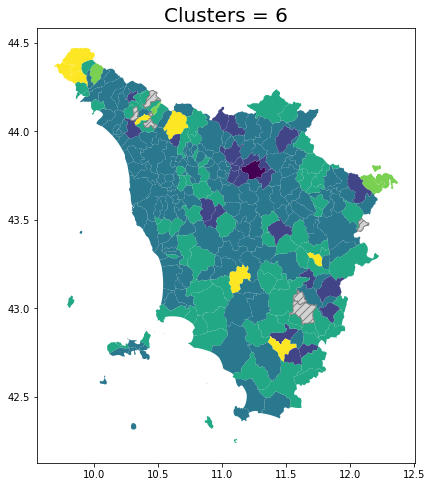

In [7]:
tess.plot(column='label',figsize = (12,8), cmap ='viridis',missing_kwds={"color": "lightgrey","edgecolor": "gray","hatch": "///","label": "Missing values"})
plt.title('Clusters = 6', fontsize = 20); #viridis,plasma,inferno,cividis
#plt.savefig('hier_results\\comuni_maps_6')

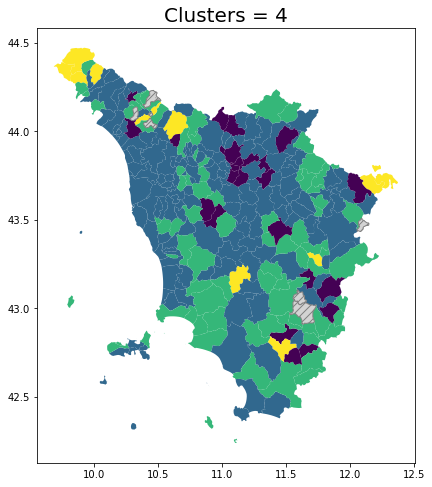

In [14]:
tess.plot(column='label',figsize = (12,8), cmap ='viridis',missing_kwds={"color": "lightgrey","edgecolor": "gray","hatch": "///","label": "Missing values"})
plt.title('Clusters = 4', fontsize = 20) #viridis,plasma,inferno,cividis
#plt.savefig('hier_results\\comuni_maps_4')

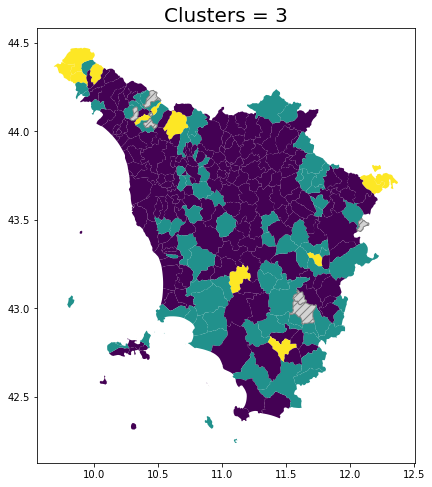

In [16]:
tess.plot(column='label',figsize = (12,8), cmap ='viridis',missing_kwds={"color": "lightgrey","edgecolor": "gray","hatch": "///","label": "Missing values"})
plt.title('Clusters = 3', fontsize = 20) #viridis,plasma,inferno,cividis
#plt.savefig('hier_results\\comuni_maps_3')

In [71]:
import contextily as ctx
tess = tess.to_crs(epsg=3857)

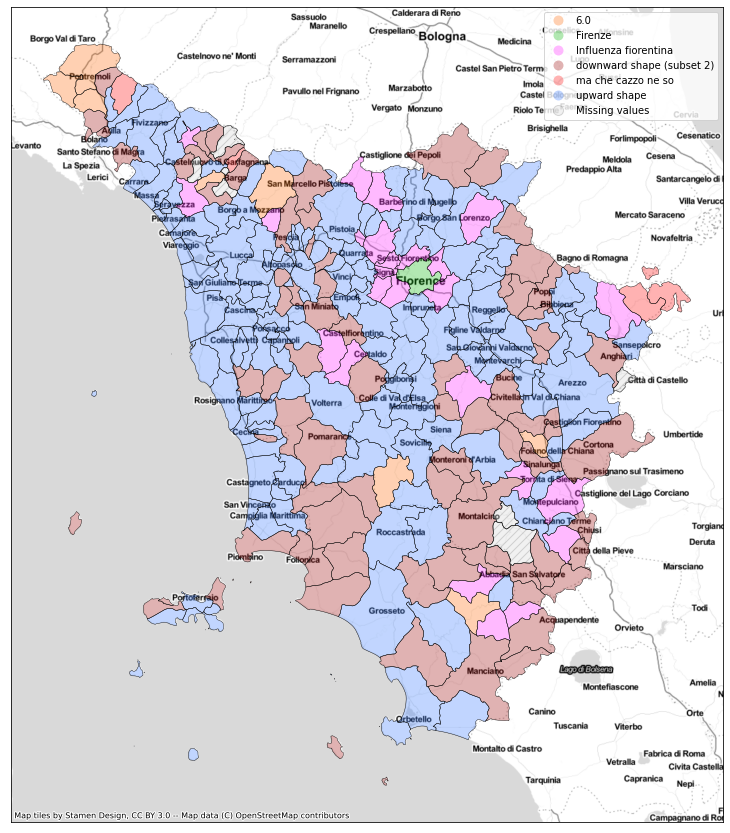

In [76]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
#tess.apply(lambda x: ax.annotate(text=x.name, family='sans-serif', xy=x.geometry.centroid.coords[0], ha='center',va ='center', fontsize=7),axis=1);
tess.boundary.plot(ax=ax, color='Black', linewidth=.4)
tess.plot( legend = True,categorical = True,ax=ax,column = 'label', cmap=cmap,alpha = 0.3, figsize=(12, 12),missing_kwds={"color": "lightgrey","edgecolor": "gray","hatch": "///","label": "Missing values"});#plt.legend(tess['label'])



#ctx.add_basemap(ax)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, zoom = 9)
#ax.set_axis_off()



plt.xticks([])
plt.yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([]);
#plt.title('Clusters = 2', fontsize = 20); 
#plt.savefig('hier_results\\comuni_maps_2')

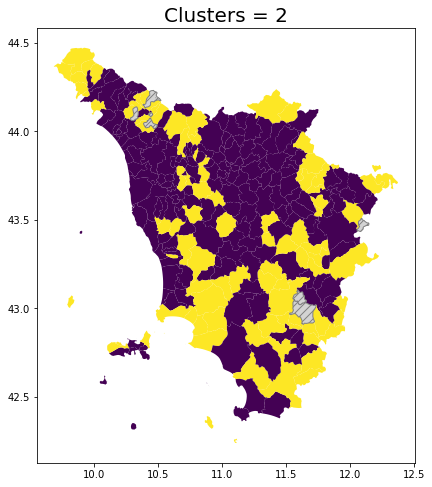

In [18]:
tess.plot(column='label',figsize = (12,8), cmap ='viridis',missing_kwds={"color": "lightgrey","edgecolor": "gray","hatch": "///","label": "Missing values"})
plt.title('Clusters = 2', fontsize = 20) #viridis,plasma,inferno,cividis
#plt.savefig('hier_results\\comuni_maps_2')